In [1]:
import os
from itertools import combinations

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import pandas as pd
from scipy.stats import mode
from sklearn.linear_model import LogisticRegression

from pneumonia.model.base import load_keras_model, load_keras_model_from_task_dir
from pneumonia.evaluation.keras import evaluate_keras_model
from pneumonia.evaluation.commons import calculate_scores
from pneumonia.ensembling import get_trained_models_predictions_and_trues
from pneumonia.plot import plot_confusion_matrix, plot_corrcoef_matrix

from keras import backend as K

%matplotlib inline

Using TensorFlow backend.


In [5]:
model_predictions, val_trues, test_trues = get_trained_models_predictions_and_trues()

Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
11/10 [===============================] - 5s 420ms/step
Found 624 images belonging to 2 classes.
7/6 [=================================] - 3s 394ms/step
Found 1045 images belonging to 2 classes.
11/10 [===============================] - 5s 419ms/step
Found 624 images belonging to 2 classes.
7/6 [=================================] - 3s 393ms/step
Found 1045 images belonging to 2 classes.
11/10 [===============================] - 7s 641ms/step
Found 624 images belonging to 2 classes.
7/6 [=================================] - 3s 459ms/step
Found 1045 images belonging to 2 classes.
11/10 [===============================] - 5s 419ms/step
Found 624 images belonging to 2 classes.
7/6 [=================================] - 3s 393ms/step
Found 1045 images belonging to 2 classes.
11/10 [===============================] - 7s 658ms/step
Found 624 images belonging to 2 classes

In [6]:
model_predictions_dict = {model.name: model for model in model_predictions}

/home/fernandocamargo/anaconda3/envs/chest-xray-pneumonia/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


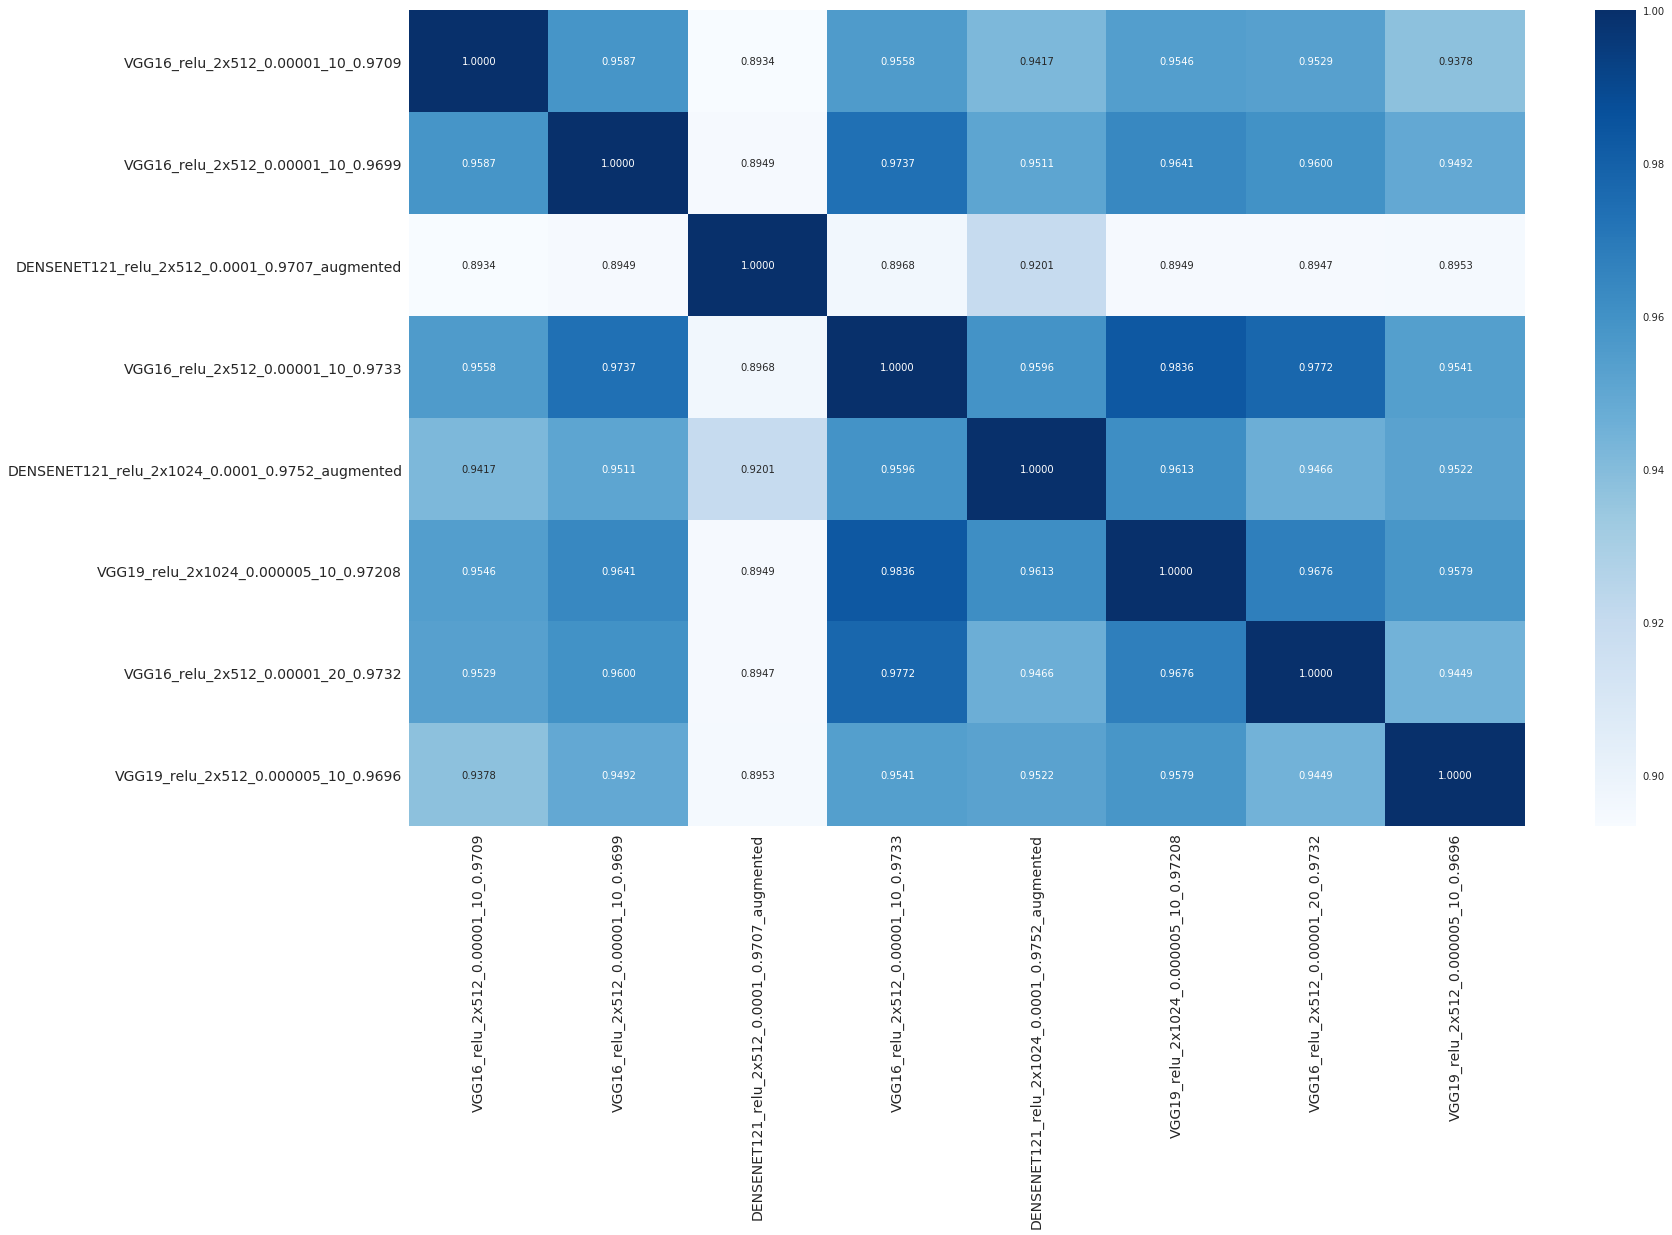

In [7]:
plot_corrcoef_matrix(np.corrcoef([model.test_probas for model in model_predictions]),
                     model_names=[model.name for model in model_predictions]).show()

In [8]:
model_names = np.array([model.name for model in model_predictions])
index_of_best_model = list(model_names).index("DENSENET121_relu_2x1024_0.0001_0.9752_augmented")

In [9]:
best_model_corr = np.corrcoef([model.test_probas for model in model_predictions])[index_of_best_model, :]

In [10]:
less_correlated_models = model_names[best_model_corr < 0.97]
less_correlated_models_corr = best_model_corr[best_model_corr < 0.97]
pd.DataFrame(dict(model=less_correlated_models, corr=less_correlated_models_corr))

,model,corr
0,VGG16_relu_2x512_0.00001_10_0.9709,0.941737
1,VGG16_relu_2x512_0.00001_10_0.9699,0.951127
2,DENSENET121_relu_2x512_0.0001_0.9707_augmented,0.920121
3,VGG16_relu_2x512_0.00001_10_0.9733,0.959591
4,VGG19_relu_2x1024_0.000005_10_0.97208,0.961263
5,VGG16_relu_2x512_0.00001_20_0.9732,0.946608
6,VGG19_relu_2x512_0.000005_10_0.9696,0.952250


/home/fernandocamargo/anaconda3/envs/chest-xray-pneumonia/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


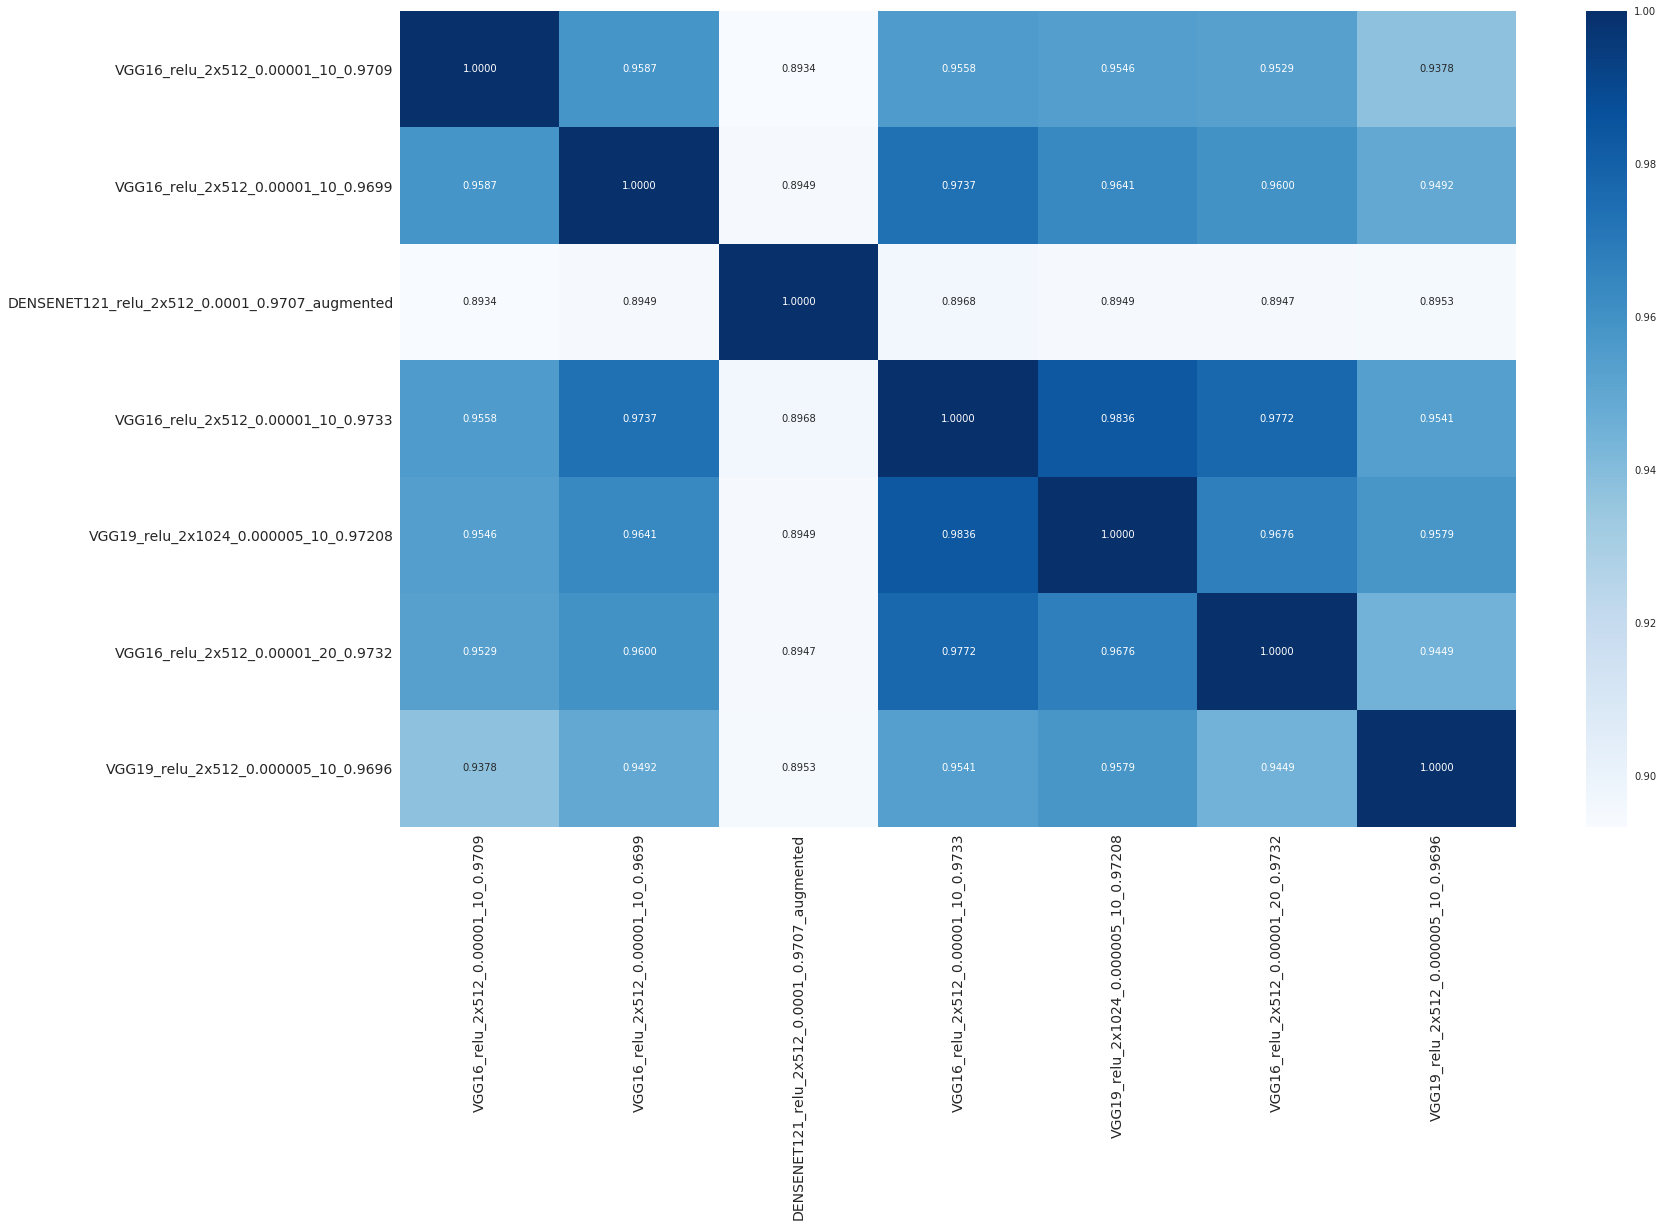

In [11]:
plot_corrcoef_matrix(np.corrcoef([model.test_probas for model in model_predictions if model.name in less_correlated_models]),
                     model_names=[model.name for model in model_predictions if model.name in less_correlated_models]).show()

/home/fernandocamargo/anaconda3/envs/chest-xray-pneumonia/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


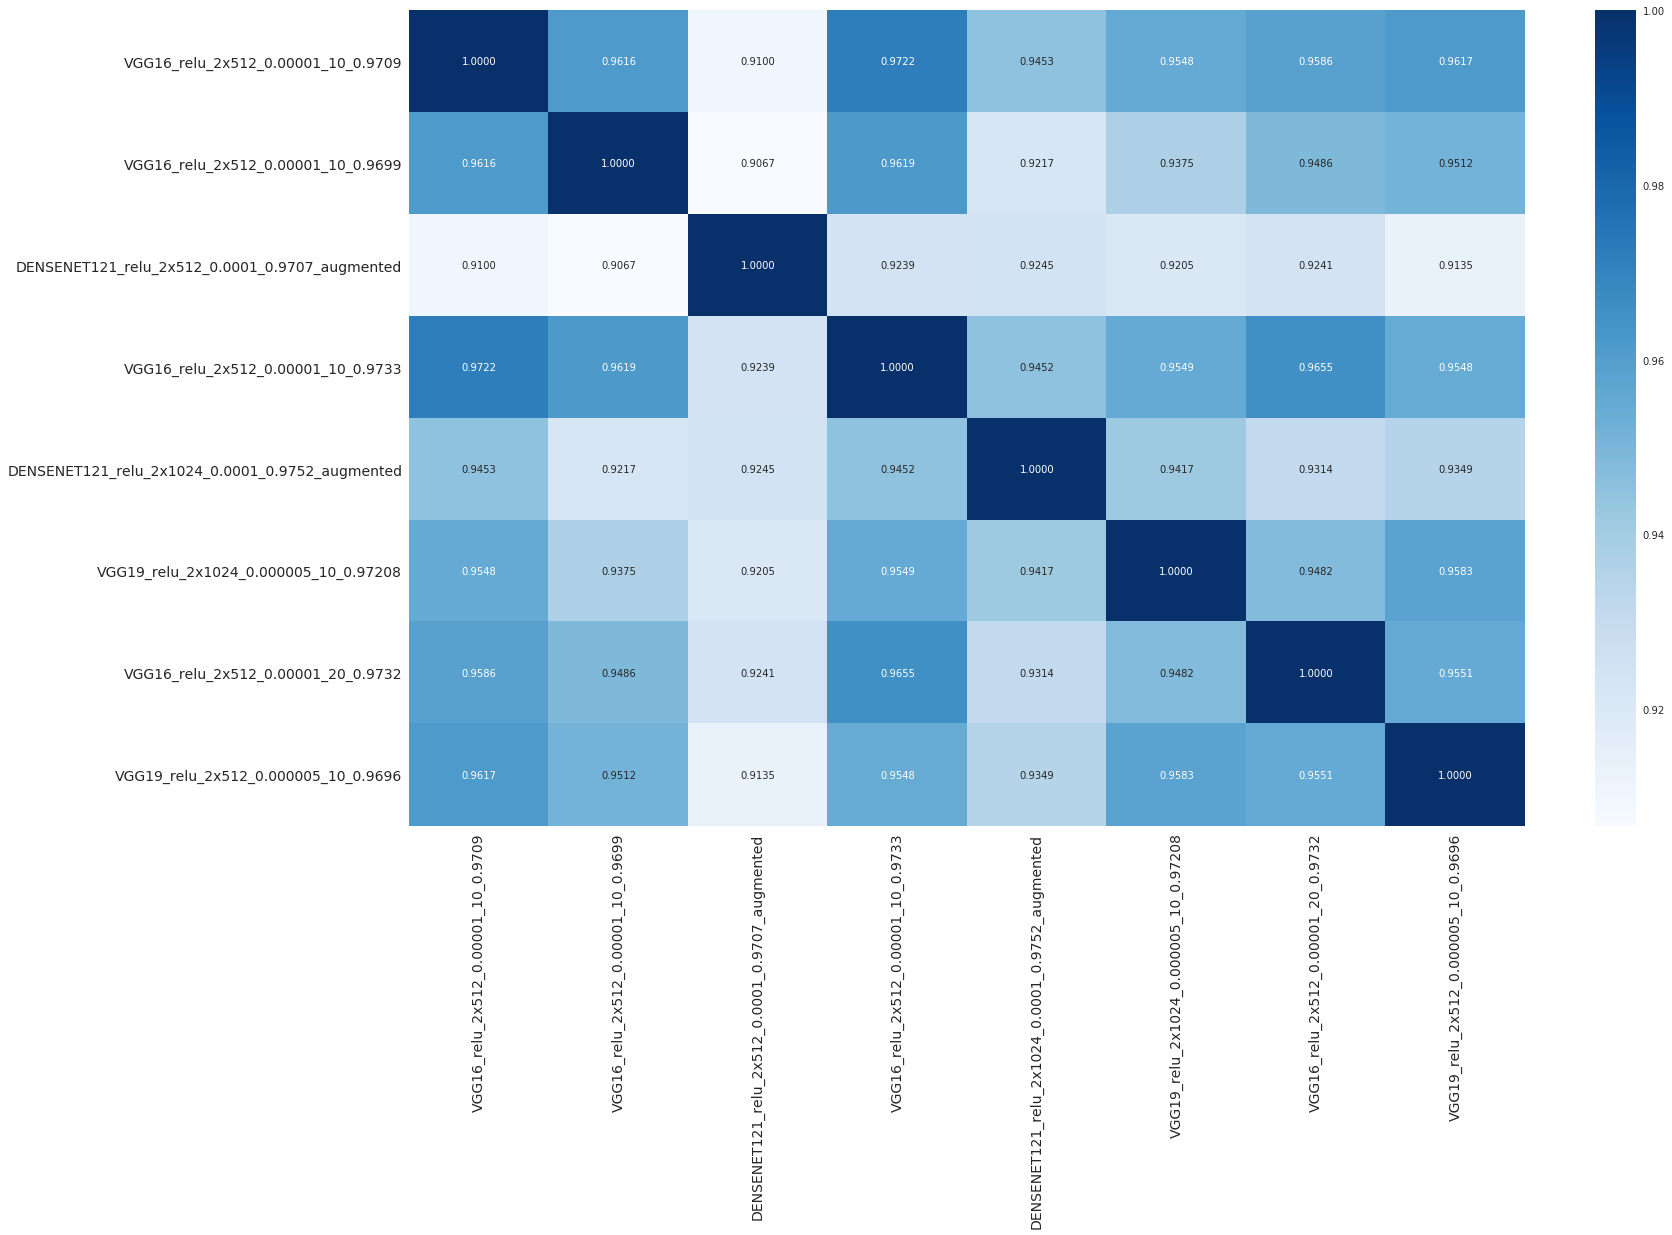

In [12]:
plot_corrcoef_matrix(np.corrcoef([model.test_preds for model in model_predictions]),
                     model_names=[model.name for model in model_predictions]).show()

/home/fernandocamargo/anaconda3/envs/chest-xray-pneumonia/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


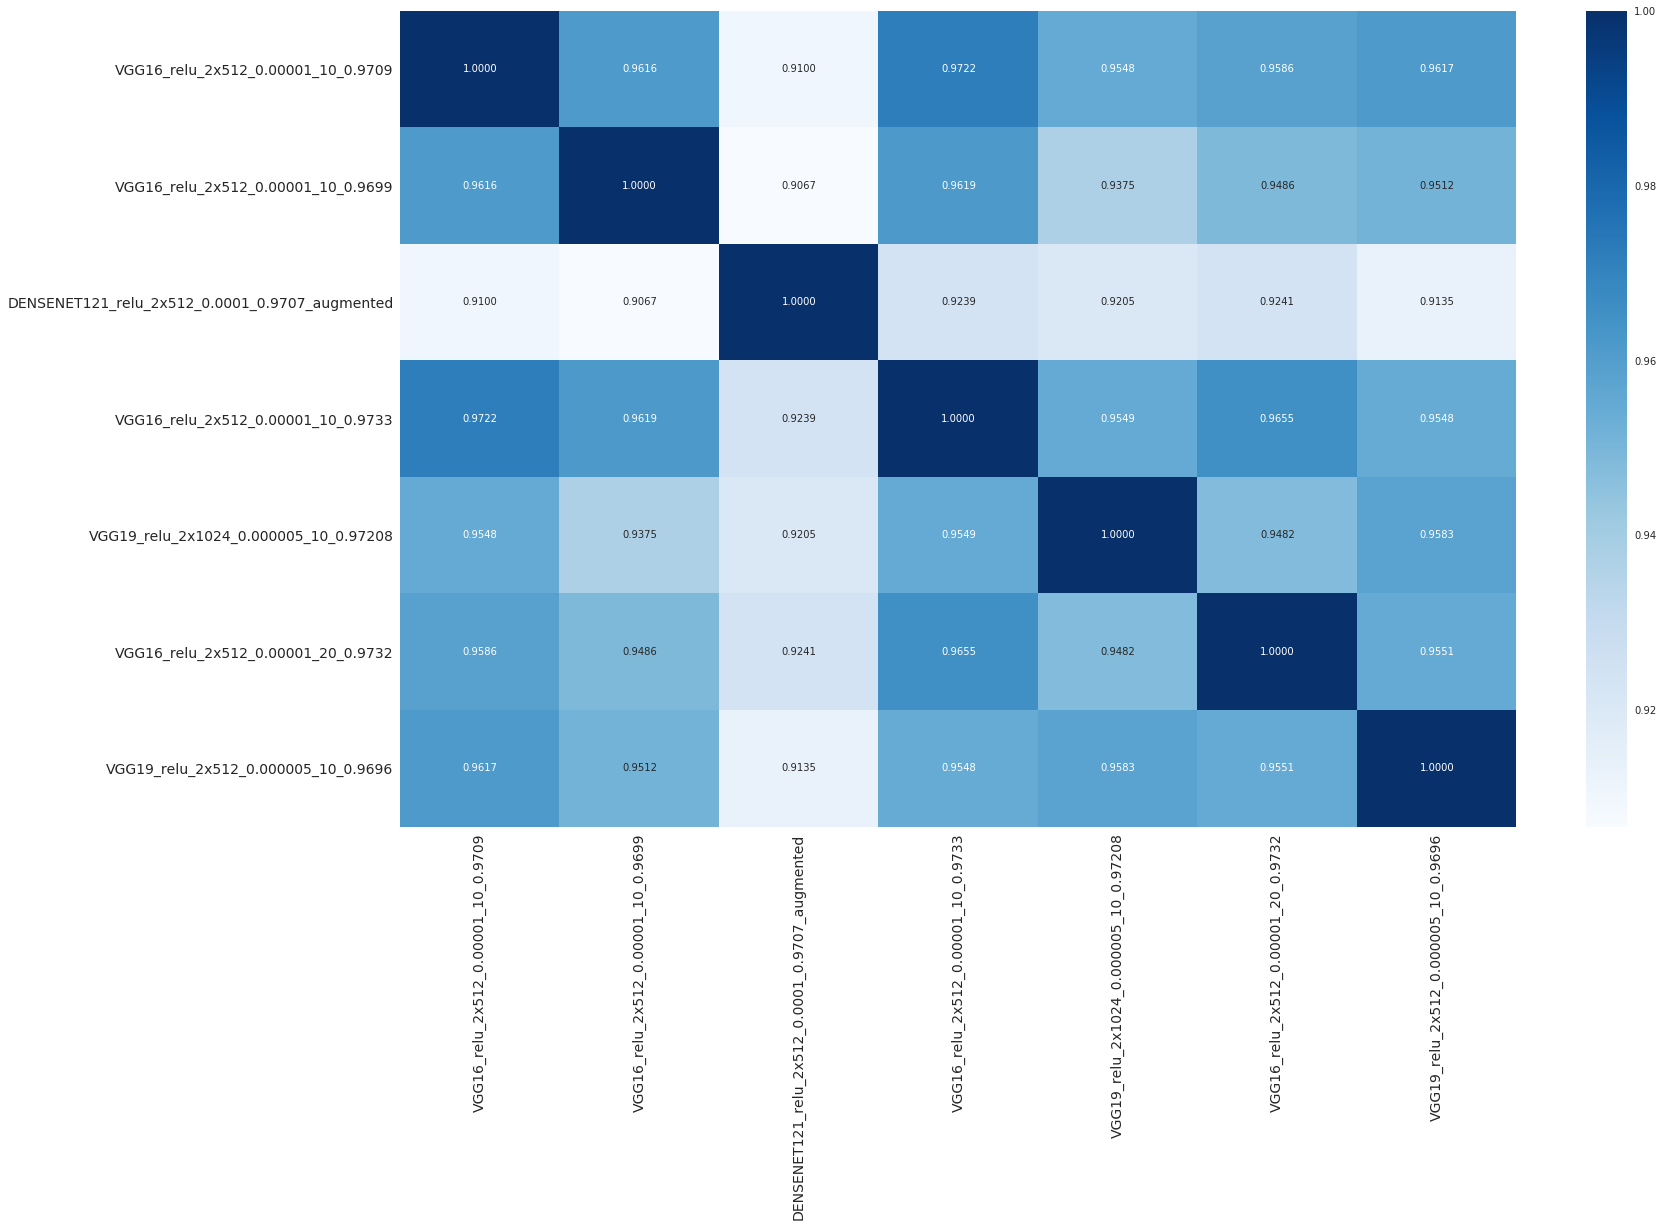

In [13]:
plot_corrcoef_matrix(np.corrcoef([model.test_preds for model in model_predictions if model.name in less_correlated_models]),
                     model_names=[model.name for model in model_predictions if model.name in less_correlated_models]).show()

In [14]:
def print_scores(trues, preds):
    acc, precision, recall, f1_score, confusion_matrix = calculate_scores(trues, preds)
    print(f"acc: {acc}")
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"f1 score: {f1_score}")
    print(f"confusion matrix: {confusion_matrix}")

In [15]:
for model in model_predictions:
    print(model.name)
    print_scores(model.val_preds, val_trues)
    print()

VGG16_relu_2x512_0.00001_10_0.9709
acc: 0.9827751196172249
precision: 0.9768041237113402
recall: 1.0
f1 score: 0.9882659713168187
confusion matrix: [[269, 18], [0, 758]]

VGG16_relu_2x512_0.00001_10_0.9699
acc: 0.9722488038277513
precision: 0.9626288659793815
recall: 1.0
f1 score: 0.9809586342744583
confusion matrix: [[269, 29], [0, 747]]

DENSENET121_relu_2x512_0.0001_0.9707_augmented
acc: 0.9550239234449761
precision: 0.9394329896907216
recall: 1.0
f1 score: 0.9687707641196013
confusion matrix: [[269, 47], [0, 729]]

VGG16_relu_2x512_0.00001_10_0.9733
acc: 0.9636363636363636
precision: 0.9510309278350515
recall: 1.0
f1 score: 0.9749009247027741
confusion matrix: [[269, 38], [0, 738]]

DENSENET121_relu_2x1024_0.0001_0.9752_augmented
acc: 0.9454545454545454
precision: 0.9265463917525774
recall: 1.0
f1 score: 0.9618729096989966
confusion matrix: [[269, 57], [0, 719]]

VGG19_relu_2x1024_0.000005_10_0.97208
acc: 0.9607655502392345
precision: 0.9471649484536082
recall: 1.0
f1 score: 0.9728

In [16]:
for model in model_predictions:
    print(model.name)
    print_scores(model.test_preds, test_trues)
    print()

VGG16_relu_2x512_0.00001_10_0.9709
acc: 0.9631410256410257
precision: 0.9846153846153847
recall: 0.9576059850374065
f1 score: 0.9709228824273073
confusion matrix: [[217, 6], [17, 384]]

VGG16_relu_2x512_0.00001_10_0.9699
acc: 0.9615384615384616
precision: 0.9923076923076923
recall: 0.9485294117647058
f1 score: 0.9699248120300752
confusion matrix: [[213, 3], [21, 387]]

DENSENET121_relu_2x512_0.0001_0.9707_augmented
acc: 0.9631410256410257
precision: 0.9769230769230769
recall: 0.9645569620253165
f1 score: 0.9707006369426753
confusion matrix: [[220, 9], [14, 381]]

VGG16_relu_2x512_0.00001_10_0.9733
acc: 0.9663461538461539
precision: 0.9846153846153847
recall: 0.9624060150375939
f1 score: 0.973384030418251
confusion matrix: [[219, 6], [15, 384]]

DENSENET121_relu_2x1024_0.0001_0.9752_augmented
acc: 0.969551282051282
precision: 0.9769230769230769
recall: 0.9744245524296675
f1 score: 0.9756722151088348
confusion matrix: [[224, 9], [10, 381]]

VGG19_relu_2x1024_0.000005_10_0.97208
acc: 0.96

# Ensembles

## Ensemble de votação

In [17]:
def evaluate_ensemble_for_voting(ensemble):
    print([model.name for model in ensemble])
    ensemble_test = np.column_stack([model.test_preds for model in ensemble])
    ensemble_test_preds = mode(ensemble_test, axis=1).mode.flatten()
    print_scores(ensemble_test_preds, test_trues)
    return ensemble_test_preds

In [19]:
evaluate_ensemble_for_voting([model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
                              model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
                              model_predictions_dict["VGG16_relu_2x512_0.00001_10_0.9733"],
                              model_predictions_dict["VGG19_relu_2x512_0.000005_10_0.9696"],
                             ])

['DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'VGG16_relu_2x512_0.00001_10_0.9733', 'VGG19_relu_2x512_0.000005_10_0.9696']
acc: 0.9727564102564102
precision: 0.9846153846153847
recall: 0.9721518987341772
f1 score: 0.978343949044586
confusion matrix: [[223, 6], [11, 384]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
evaluate_ensemble_for_voting([model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
                              model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
                              model_predictions_dict["VGG16_relu_2x512_0.00001_20_0.9732"],
                             ])

['DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'VGG16_relu_2x512_0.00001_20_0.9732']
acc: 0.9759615384615384
precision: 0.9871794871794872
recall: 0.9746835443037974
f1 score: 0.980891719745223
confusion matrix: [[224, 5], [10, 385]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [120]:
evaluate_ensemble_for_voting([
    model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
    model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
    model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
    model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
    model_predictions_dict["VGG16_relu_2x512_0.00001_20_0.9732"],
    model_predictions_dict["VGG19_relu_2x1024_0.000005_10_0.97208"],
                             ])

['DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'VGG16_relu_2x512_0.00001_20_0.9732', 'VGG19_relu_2x1024_0.000005_10_0.97208']
acc: 0.9775641025641025
precision: 0.9846153846153847
recall: 0.9795918367346939
f1 score: 0.9820971867007673
confusion matrix: [[226, 6], [8, 384]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Ensemble com média de votos com pesos

In [145]:
def evaluate_ensemble_for_voting(ensemble, weights):
    print([model.name for model in ensemble])
    ensemble_test = np.column_stack([model.test_preds for model in ensemble])
    ensemble_test_preds = np.apply_along_axis(
                lambda x: np.argmax(
                    np.bincount(x, weights=weights)),
                axis=1, arr=ensemble_test)
    print_scores(ensemble_test_preds, test_trues)
    return ensemble_test_preds

In [263]:
evaluate_ensemble_for_voting([
    model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
    model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
    model_predictions_dict["VGG16_relu_2x512_0.00001_20_0.9732"],
    model_predictions_dict["VGG19_relu_2x1024_0.000005_10_0.97208"],
                             ], weights=[2.1, 2, 1, 0.9])

['DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'VGG16_relu_2x512_0.00001_20_0.9732', 'VGG19_relu_2x1024_0.000005_10_0.97208']
acc: 0.9775641025641025
precision: 0.9871794871794872
recall: 0.9771573604060914
f1 score: 0.9821428571428572
confusion matrix: [[225, 5], [9, 385]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [226]:
evaluate_ensemble_for_voting([
    model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
    model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
    model_predictions_dict["VGG16_relu_2x512_0.00001_20_0.9732"],
                             ], weights=[2, 2, 1.5])

['DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'VGG16_relu_2x512_0.00001_20_0.9732']
acc: 0.9759615384615384
precision: 0.9871794871794872
recall: 0.9746835443037974
f1 score: 0.980891719745223
confusion matrix: [[224, 5], [10, 385]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Ensemble de média de probabilidades

In [19]:
def evaluate_ensemble_for_proba_mean(ensemble, threshold=0.5):
    print([model.name for model in ensemble])
    ensemble_test = np.column_stack([model.test_probas for model in ensemble])
    ensemble_test_preds = (np.average(ensemble_test, axis=1) > threshold).astype(int)
    print_scores(ensemble_test_preds, test_trues)
    return ensemble_test_preds

In [20]:
evaluate_ensemble_for_proba_mean([model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
                              model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
                              model_predictions_dict["VGG16_relu_2x512_0.00001_10_0.9733"],
                              model_predictions_dict["VGG19_relu_2x512_0.000005_10_0.9696"],
                             ], threshold=0.98)

['DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'VGG16_relu_2x512_0.00001_10_0.9733', 'VGG19_relu_2x512_0.000005_10_0.9696']
acc: 0.9615384615384616
precision: 0.982051282051282
recall: 0.9575
f1 score: 0.9696202531645569
confusion matrix: [[217, 7], [17, 383]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Ensemble com Regressão Logística

In [24]:
def evaluate_ensemble_with_logistic_regression(ensemble, class_weight="balanced", C=1, threshold=0.5):
    ensemble_val = np.column_stack([model.val_probas for model in ensemble])
    clf = LogisticRegression(class_weight=class_weight, C=C, random_state=42)
    clf.fit(ensemble_val, val_trues)
    
    ensemble_test_probas = np.column_stack([model.test_probas for model in ensemble])
    ensemble_test = clf.predict_proba(ensemble_test_probas)[:,1]
    
    ensemble_test_preds = (ensemble_test > threshold).astype(int)
    
    print([model.name for model in ensemble])
    print(f"intercept: {clf.intercept_}")
    print(f"coef: {clf.coef_}")
    print_scores(ensemble_test_preds, test_trues)
    return ensemble_test_preds

In [25]:
evaluate_ensemble_with_logistic_regression([model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
                              model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
                              model_predictions_dict["VGG16_relu_2x512_0.00001_10_0.9733"],
                              model_predictions_dict["VGG19_relu_2x512_0.000005_10_0.9696"],
                             ], threshold=0.99)

['DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'VGG16_relu_2x512_0.00001_10_0.9733', 'VGG19_relu_2x512_0.000005_10_0.9696']
intercept: [-4.37389606]
coef: [[1.43260646 1.8619265  3.13165979 3.26807066]]
acc: 0.9567307692307693
precision: 0.9871794871794872
recall: 0.9459459459459459
f1 score: 0.9661229611041405
confusion matrix: [[212, 5], [22, 385]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Ensemble com Regressão Logística com Votos

In [231]:
def evaluate_ensemble_with_logistic_regression_for_votes(ensemble, class_weight="balanced", C=1, threshold=0.5):
    ensemble_val = np.column_stack([model.val_preds for model in ensemble])
    clf = LogisticRegression(class_weight=class_weight, C=C, random_state=42)
    clf.fit(ensemble_val, val_trues)
    
    ensemble_test_probas = np.column_stack([model.test_preds for model in ensemble])
    ensemble_test = clf.predict_proba(ensemble_test_probas)[:,1]
    
    ensemble_test_preds = (ensemble_test > threshold).astype(int)
    
    print([model.name for model in ensemble])
    print(f"intercept: {clf.intercept_}")
    print(f"coef: {clf.coef_}")
    print_scores(ensemble_test_preds, test_trues)
    return ensemble_test_preds

In [230]:
evaluate_ensemble_with_logistic_regression_for_votes([model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
                              model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
                              model_predictions_dict["VGG16_relu_2x512_0.00001_20_0.9732"],
                             ], C=1.5, threshold=0.7)

['DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'VGG16_relu_2x512_0.00001_20_0.9732']
intercept: [-3.75043208]
coef: [[2.70418349 2.16416364 2.20583318]]
acc: 0.9759615384615384
precision: 0.9871794871794872
recall: 0.9746835443037974
f1 score: 0.980891719745223
confusion matrix: [[224, 5], [10, 385]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [213]:
evaluate_ensemble_with_logistic_regression_for_votes([model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
                              model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
                              model_predictions_dict["VGG16_relu_2x512_0.00001_20_0.9732"],
                              model_predictions_dict["VGG19_relu_2x1024_0.000005_10_0.97208"],
                             ], C=0.5, threshold=0.929391)

['DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'VGG16_relu_2x512_0.00001_20_0.9732', 'VGG19_relu_2x1024_0.000005_10_0.97208']
intercept: [-3.08376669]
coef: [[1.6611719  1.91461827 3.19648434 2.08541786]]
acc: 0.9759615384615384
precision: 0.982051282051282
recall: 0.979539641943734
f1 score: 0.9807938540332907
confusion matrix: [[226, 7], [8, 383]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Melhores ensembles e imagens erradas

In [84]:
ensemble_1_preds = evaluate_ensemble_for_voting([model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
                              model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
                              model_predictions_dict["VGG16_relu_2x512_0.00001_20_0.9732"],
                             ])
print()

ensemble_2_preds = evaluate_ensemble_with_logistic_regression_for_votes([model_predictions_dict["DENSENET121_relu_2x1024_0.0001_0.9752_augmented"],
                              model_predictions_dict["DENSENET121_relu_2x512_0.0001_0.9707_augmented"],
                              model_predictions_dict["VGG16_relu_2x512_0.00001_20_0.9732"],
                             ], C=1.5, threshold=0.7)

['DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'VGG16_relu_2x512_0.00001_20_0.9732']
acc: 0.9759615384615384
precision: 0.9871794871794872
recall: 0.9746835443037974
f1 score: 0.980891719745223
confusion matrix: [[224, 5], [10, 385]]

['DENSENET121_relu_2x1024_0.0001_0.9752_augmented', 'DENSENET121_relu_2x512_0.0001_0.9707_augmented', 'VGG16_relu_2x512_0.00001_20_0.9732']
intercept: [-3.11265392]
coef: [[3.19531757 2.53501724 3.60696282]]
acc: 0.9759615384615384
precision: 0.9871794871794872
recall: 0.9746835443037974
f1 score: 0.980891719745223
confusion matrix: [[224, 5], [10, 385]]


In [86]:
from pneumonia.model.vgg16 import VGG16

In [87]:
test_generator = load_keras_model_from_task_dir(VGG16, "trained_models/VGG16_relu_2x512_0.00001_10_0.9733").get_test_generator()

Found 624 images belonging to 2 classes.


NORMAL/IM-0073-0001_resized.jpeg


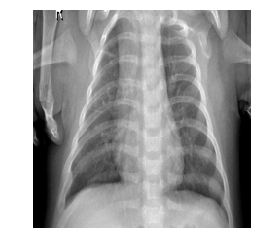

NORMAL/NORMAL2-IM-0210-0001_resized.jpeg


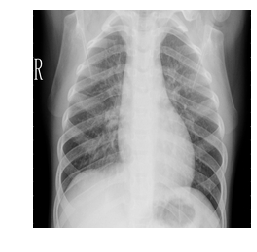

NORMAL/NORMAL2-IM-0222-0001_resized.jpeg


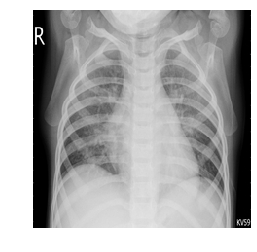

NORMAL/NORMAL2-IM-0232-0001_resized.jpeg


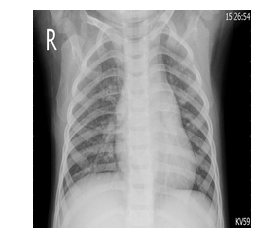

NORMAL/NORMAL2-IM-0233-0001_resized.jpeg


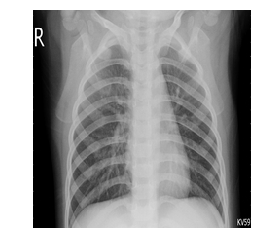

NORMAL/NORMAL2-IM-0237-0001_resized.jpeg


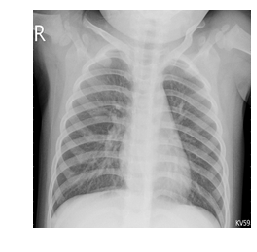

NORMAL/NORMAL2-IM-0246-0001_resized.jpeg


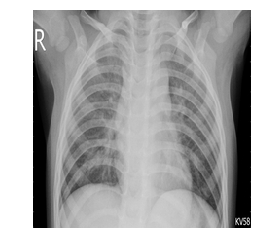

NORMAL/NORMAL2-IM-0252-0001_resized.jpeg


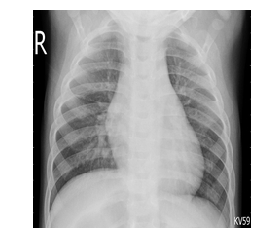

NORMAL/NORMAL2-IM-0256-0001_resized.jpeg


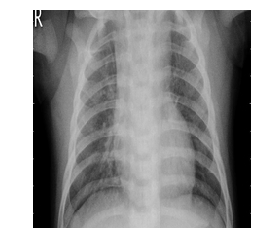

NORMAL/NORMAL2-IM-0330-0001_resized.jpeg


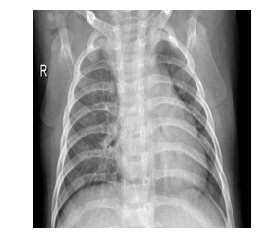

PNEUMONIA/person138_bacteria_658_resized.jpeg


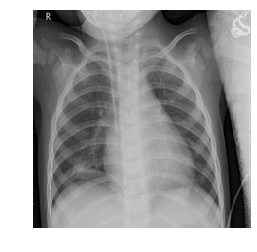

PNEUMONIA/person153_bacteria_726_resized.jpeg


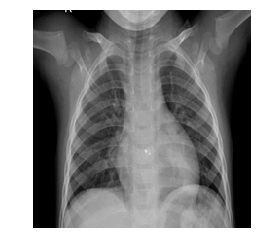

PNEUMONIA/person154_bacteria_728_resized.jpeg


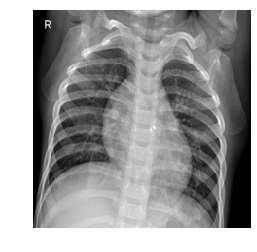

PNEUMONIA/person21_virus_53_resized.jpeg


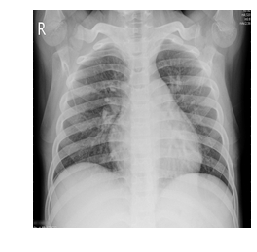

PNEUMONIA/person88_bacteria_439_resized.jpeg


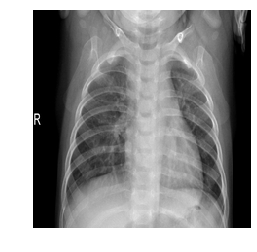

In [88]:
misclassified_filenames_ensemble_1 = np.array(test_generator.filenames)[test_trues != ensemble_1_preds]
for filename in misclassified_filenames_ensemble_1:
    print(filename)
    plt.axis("off")
    plt.imshow(Image.open(os.path.join(test_generator.directory, filename)))
    plt.show()

In [89]:
misclassified_filenames_ensemble_1

array(['NORMAL/IM-0073-0001_resized.jpeg',
       'NORMAL/NORMAL2-IM-0210-0001_resized.jpeg',
       'NORMAL/NORMAL2-IM-0222-0001_resized.jpeg',
       'NORMAL/NORMAL2-IM-0232-0001_resized.jpeg',
       'NORMAL/NORMAL2-IM-0233-0001_resized.jpeg',
       'NORMAL/NORMAL2-IM-0237-0001_resized.jpeg',
       'NORMAL/NORMAL2-IM-0246-0001_resized.jpeg',
       'NORMAL/NORMAL2-IM-0252-0001_resized.jpeg',
       'NORMAL/NORMAL2-IM-0256-0001_resized.jpeg',
       'NORMAL/NORMAL2-IM-0330-0001_resized.jpeg',
       'PNEUMONIA/person138_bacteria_658_resized.jpeg',
       'PNEUMONIA/person153_bacteria_726_resized.jpeg',
       'PNEUMONIA/person154_bacteria_728_resized.jpeg',
       'PNEUMONIA/person21_virus_53_resized.jpeg',
       'PNEUMONIA/person88_bacteria_439_resized.jpeg'], dtype='<U45')